# 기울기
### 기울기 소실 문제

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
weights = np.random.randn(10, 10) * .01
x = np.random.randn(10, 1)

for i in range(1, 11):
    x = sigmoid(np.dot(weights, x))
    print(f'{i}번째 층 출력 평균: {np.mean(x)}')

1번째 층 출력 평균: 0.4923981391662232
2번째 층 출력 평균: 0.5007433168636295
3번째 층 출력 평균: 0.5007308165030734
4번째 층 출력 평균: 0.5007305713032845
5번째 층 출력 평균: 0.5007305725302615
6번째 층 출력 평균: 0.5007305725406197
7번째 층 출력 평균: 0.5007305725405601
8번째 층 출력 평균: 0.5007305725405591
9번째 층 출력 평균: 0.5007305725405591
10번째 층 출력 평균: 0.5007305725405591


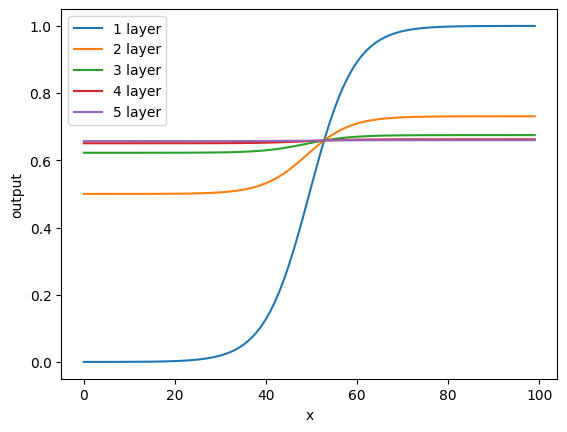

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

for i in range(1, 6):
    x = sigmoid(x)
    plt.plot(x, label=f'{i} layer')
    
plt.xlabel('x')
plt.ylabel('output')
plt.legend()
plt.show()

- 활성화 함수 변경

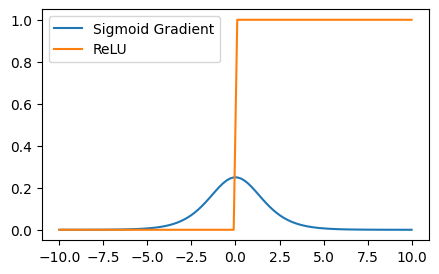

In [6]:
def relu(x):
    return np.maximum(0, x)

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_grad(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(5, 3))
plt.plot(x, sigmoid_grad(x), label='Sigmoid Gradient')
plt.plot(x, relu_grad(x), label='ReLU')
plt.legend()
plt.show()

- 잔차 연결(Residual Connection) 효과

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)
    def forward(self, x):
        return self.layer2(torch.relu(self.layer1(x)))

In [9]:
class ResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer = nn.Linear(10, 10)
        
    def forward(self, x):
        return x + torch.relu(self.layer(x))

In [10]:
simple_model = SimpleNN()
residual_model = ResidualNN()

x = torch.randn(1, 10)

output_simple = simple_model(x)
output_residual = residual_model(x)

print(f'입력값-일반 신경망: {x - output_simple}')
print(f'입력값-잔차 연결 신경망: {x - output_residual}')

입력값-일반 신경망: tensor([[-0.3936, -0.1523, -0.2744, -0.3971, -0.6557,  0.4108, -0.3226,  0.4830,
          0.5045, -1.8824]], grad_fn=<SubBackward0>)
입력값-잔차 연결 신경망: tensor([[-0.0282,  0.0000,  0.0000, -0.2554,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], grad_fn=<SubBackward0>)


In [11]:
# 기울기 변화
x = torch.randn(100, 10)
y = torch.randn(100, 10)

sim_model = SimpleNN()
res_model = ResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optimizer = optim.Adam(sim_model.parameters(), lr=0.01)
res_optimizer = optim.Adam(res_model.parameters(), lr=0.01)

In [15]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []

for epoch in range(epochs):
    sim_optimizer.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)
    
    sim_loss.backward()
    sim_optimizer.step()
    
    loss_sim_list.append(sim_loss.item())
    
    res_optimizer.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output, y)
    
    res_loss.backward()
    res_optimizer.step()

    loss_res_list.append(res_loss.item())
    
print(f'일반 신경망 손실: {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 손실: {loss_res_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기 {param.grad.norm()}')
    
for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기 {param.grad.norm()}')

일반 신경망 손실: 0.6206
잔차 연결 신경망 손실: 1.4418
일반 신경망 기울기 크기 0.029014263302087784
일반 신경망 기울기 크기 0.0075208889320492744
일반 신경망 기울기 크기 0.004727358464151621
일반 신경망 기울기 크기 0.0019292701035737991
잔차 연결 신경망 기울기 크기 0.023785704746842384
잔차 연결 신경망 기울기 크기 0.00656436150893569


In [23]:
class DeeperResidualNN(nn.Module):
    def __init__(self):
        super(DeeperResidualNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 10)
        
    def forward(self, x):
        return x + torch.relu(self.layer3(torch.relu(self.layer2(torch.relu(self.layer1(x))))))

In [ ]:
# 기울기 변화
x = torch.randn(100, 10)
y = torch.randn(100, 10)

sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeeperResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optimizer = optim.Adam(sim_model.parameters(), lr=0.01)
res_optimizer = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optimizer = optim.Adam(deep_res_model.parameters(), lr=0.01)

In [ ]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []
deep_res_loss_list = []

for epoch in range(epochs):
    sim_optimizer.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)
    
    sim_loss.backward()
    sim_optimizer.step()
    
    loss_sim_list.append(sim_loss.item())
    
    res_optimizer.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output, y)
    
    res_loss.backward()
    res_optimizer.step()

    loss_res_list.append(res_loss.item())
    
    deep_res_optimizer.zero_grad()
    deep_res_output = deep_res_model(x)
    deep_res_loss = criterion(deep_res_output, y)
    
    deep_res_loss.backward()
    deep_res_optimizer.step()
    
    deep_res_loss_list.append(deep_res_loss.item())
    
print(f'일반 신경망 손실: {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 손실: {loss_res_list[-1]:.4f}')
print(f'더 깊은 잔차 연결 신경망 손실: {deep_res_loss_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기 {param.grad.norm()}')
    
for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기 {param.grad.norm()}')
    
for param in deep_res_model.parameters():
    print(f'더 깊은 잔차 연결 신경망 기울기 크기 {param.grad.norm()}')

In [28]:
class DeeperResidualNN(nn.Module):
    def __init__(self):
        super(DeeperResidualNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 10)
        
    def forward(self, x):
        residual = x 
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x + residual

# 기울기 변화
x = torch.randn(100, 10)
y = torch.randn(100, 10)

sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeeperResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optimizer = optim.Adam(sim_model.parameters(), lr=0.01)
res_optimizer = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optimizer = optim.Adam(deep_res_model.parameters(), lr=0.01)

# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []
deep_res_loss_list = []

for epoch in range(epochs):
    sim_optimizer.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)
    
    sim_loss.backward()
    sim_optimizer.step()
    
    loss_sim_list.append(sim_loss.item())
    
    res_optimizer.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output, y)
    
    res_loss.backward()
    res_optimizer.step()

    loss_res_list.append(res_loss.item())
    
    deep_res_optimizer.zero_grad()
    deep_res_output = deep_res_model(x)
    deep_res_loss = criterion(deep_res_output, y)
    
    deep_res_loss.backward()
    deep_res_optimizer.step()
    
    deep_res_loss_list.append(deep_res_loss.item())
    
print(f'일반 신경망 손실: {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 손실: {loss_res_list[-1]:.4f}')
print(f'더 깊은 잔차 연결 신경망 손실: {deep_res_loss_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기 {param.grad.norm()}')
    
for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기 {param.grad.norm()}')
    
for param in deep_res_model.parameters():
    print(f'더 깊은 잔차 연결 신경망 기울기 크기 {param.grad.norm()}')

일반 신경망 손실: 0.7384
잔차 연결 신경망 손실: 1.3636
더 깊은 잔차 연결 신경망 손실: 0.8474
일반 신경망 기울기 크기 0.029224639758467674
일반 신경망 기울기 크기 0.008026123978197575
일반 신경망 기울기 크기 0.015718108043074608
일반 신경망 기울기 크기 0.011831252835690975
잔차 연결 신경망 기울기 크기 0.07886137813329697
잔차 연결 신경망 기울기 크기 0.019217032939195633
더 깊은 잔차 연결 신경망 기울기 크기 0.04047568142414093
더 깊은 잔차 연결 신경망 기울기 크기 0.010206249542534351
더 깊은 잔차 연결 신경망 기울기 크기 0.036705195903778076
더 깊은 잔차 연결 신경망 기울기 크기 0.009697914123535156
더 깊은 잔차 연결 신경망 기울기 크기 0.0363716296851635
더 깊은 잔차 연결 신경망 기울기 크기 0.015398229472339153
